In [1]:
import glob
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.weight'] = "bold"
plt.rcParams['legend.framealpha'] = 0


In [2]:
import os
os.getcwd()


'/work/albertl_uri_edu/f2f_sst/scripts'

In [3]:
x = sorted(glob.glob('../results/revision/*trn.txt'))


for dx,i in enumerate(x):
    print(i)
    if dx == 0:
        with open(i) as f:
            y = [j.strip().split(':')[:] for j in f]
            y = np.array(y)
            y = np.float32(y[:,1].reshape(-1))
            print(y.shape)
    else:
        with open(i) as f:
            z = [j.strip().split(':')[:] for j in f]
            z = np.array(z)
            z = np.float32(z[:,1].reshape(-1))
            print(z.shape)
            y = np.vstack((y,z))

../results/revision/0trn.txt
(100,)
../results/revision/1trn.txt
(100,)
../results/revision/2trn.txt
(100,)
../results/revision/3trn.txt
(100,)
../results/revision/4trn.txt
(100,)
../results/revision/5trn.txt
(100,)
../results/revision/6trn.txt
(100,)
../results/revision/7trn.txt
(100,)
../results/revision/8trn.txt
(100,)


In [4]:
def p1(x):
    for dx,i in enumerate(x):
        if dx == 0:
            with open(i) as f:
                y = [j.strip().split(':')[:] for j in f]
                y = np.array(y)
                y = np.float32(y[:,1].reshape(-1))
        else:
            with open(i) as f:
                z = [j.strip().split(':')[:] for j in f]
                z = np.array(z)
                z = np.float32(z[:,1].reshape(-1))
                y = np.vstack((y,z))
    return y

def q3(x):
    for adx,a in enumerate(x):
        if adx == 0:
            with open(a) as f:
                stats = []
                for i in f:
                    k = re.findall("[0-9.]*[0-9.]",i)
                    if len(k) == 2:
                        stats.append(k[0])

                    # print(len(k))
                    # print(i.strip())
                stats = np.array(stats)

        else:
            with open(a) as f:
                stats1 = []
                for i in f:
                    k = re.findall("[0-9.]*[0-9.]",i)
                    if len(k) == 2:
                        stats1.append(k[0])

                    # print(len(k))
                    # print(i.strip())
                stats = np.vstack((stats,np.asarray(stats1)))
            
    stats = np.float32(stats).T
    return stats

In [4]:
x1

NameError: name 'x1' is not defined

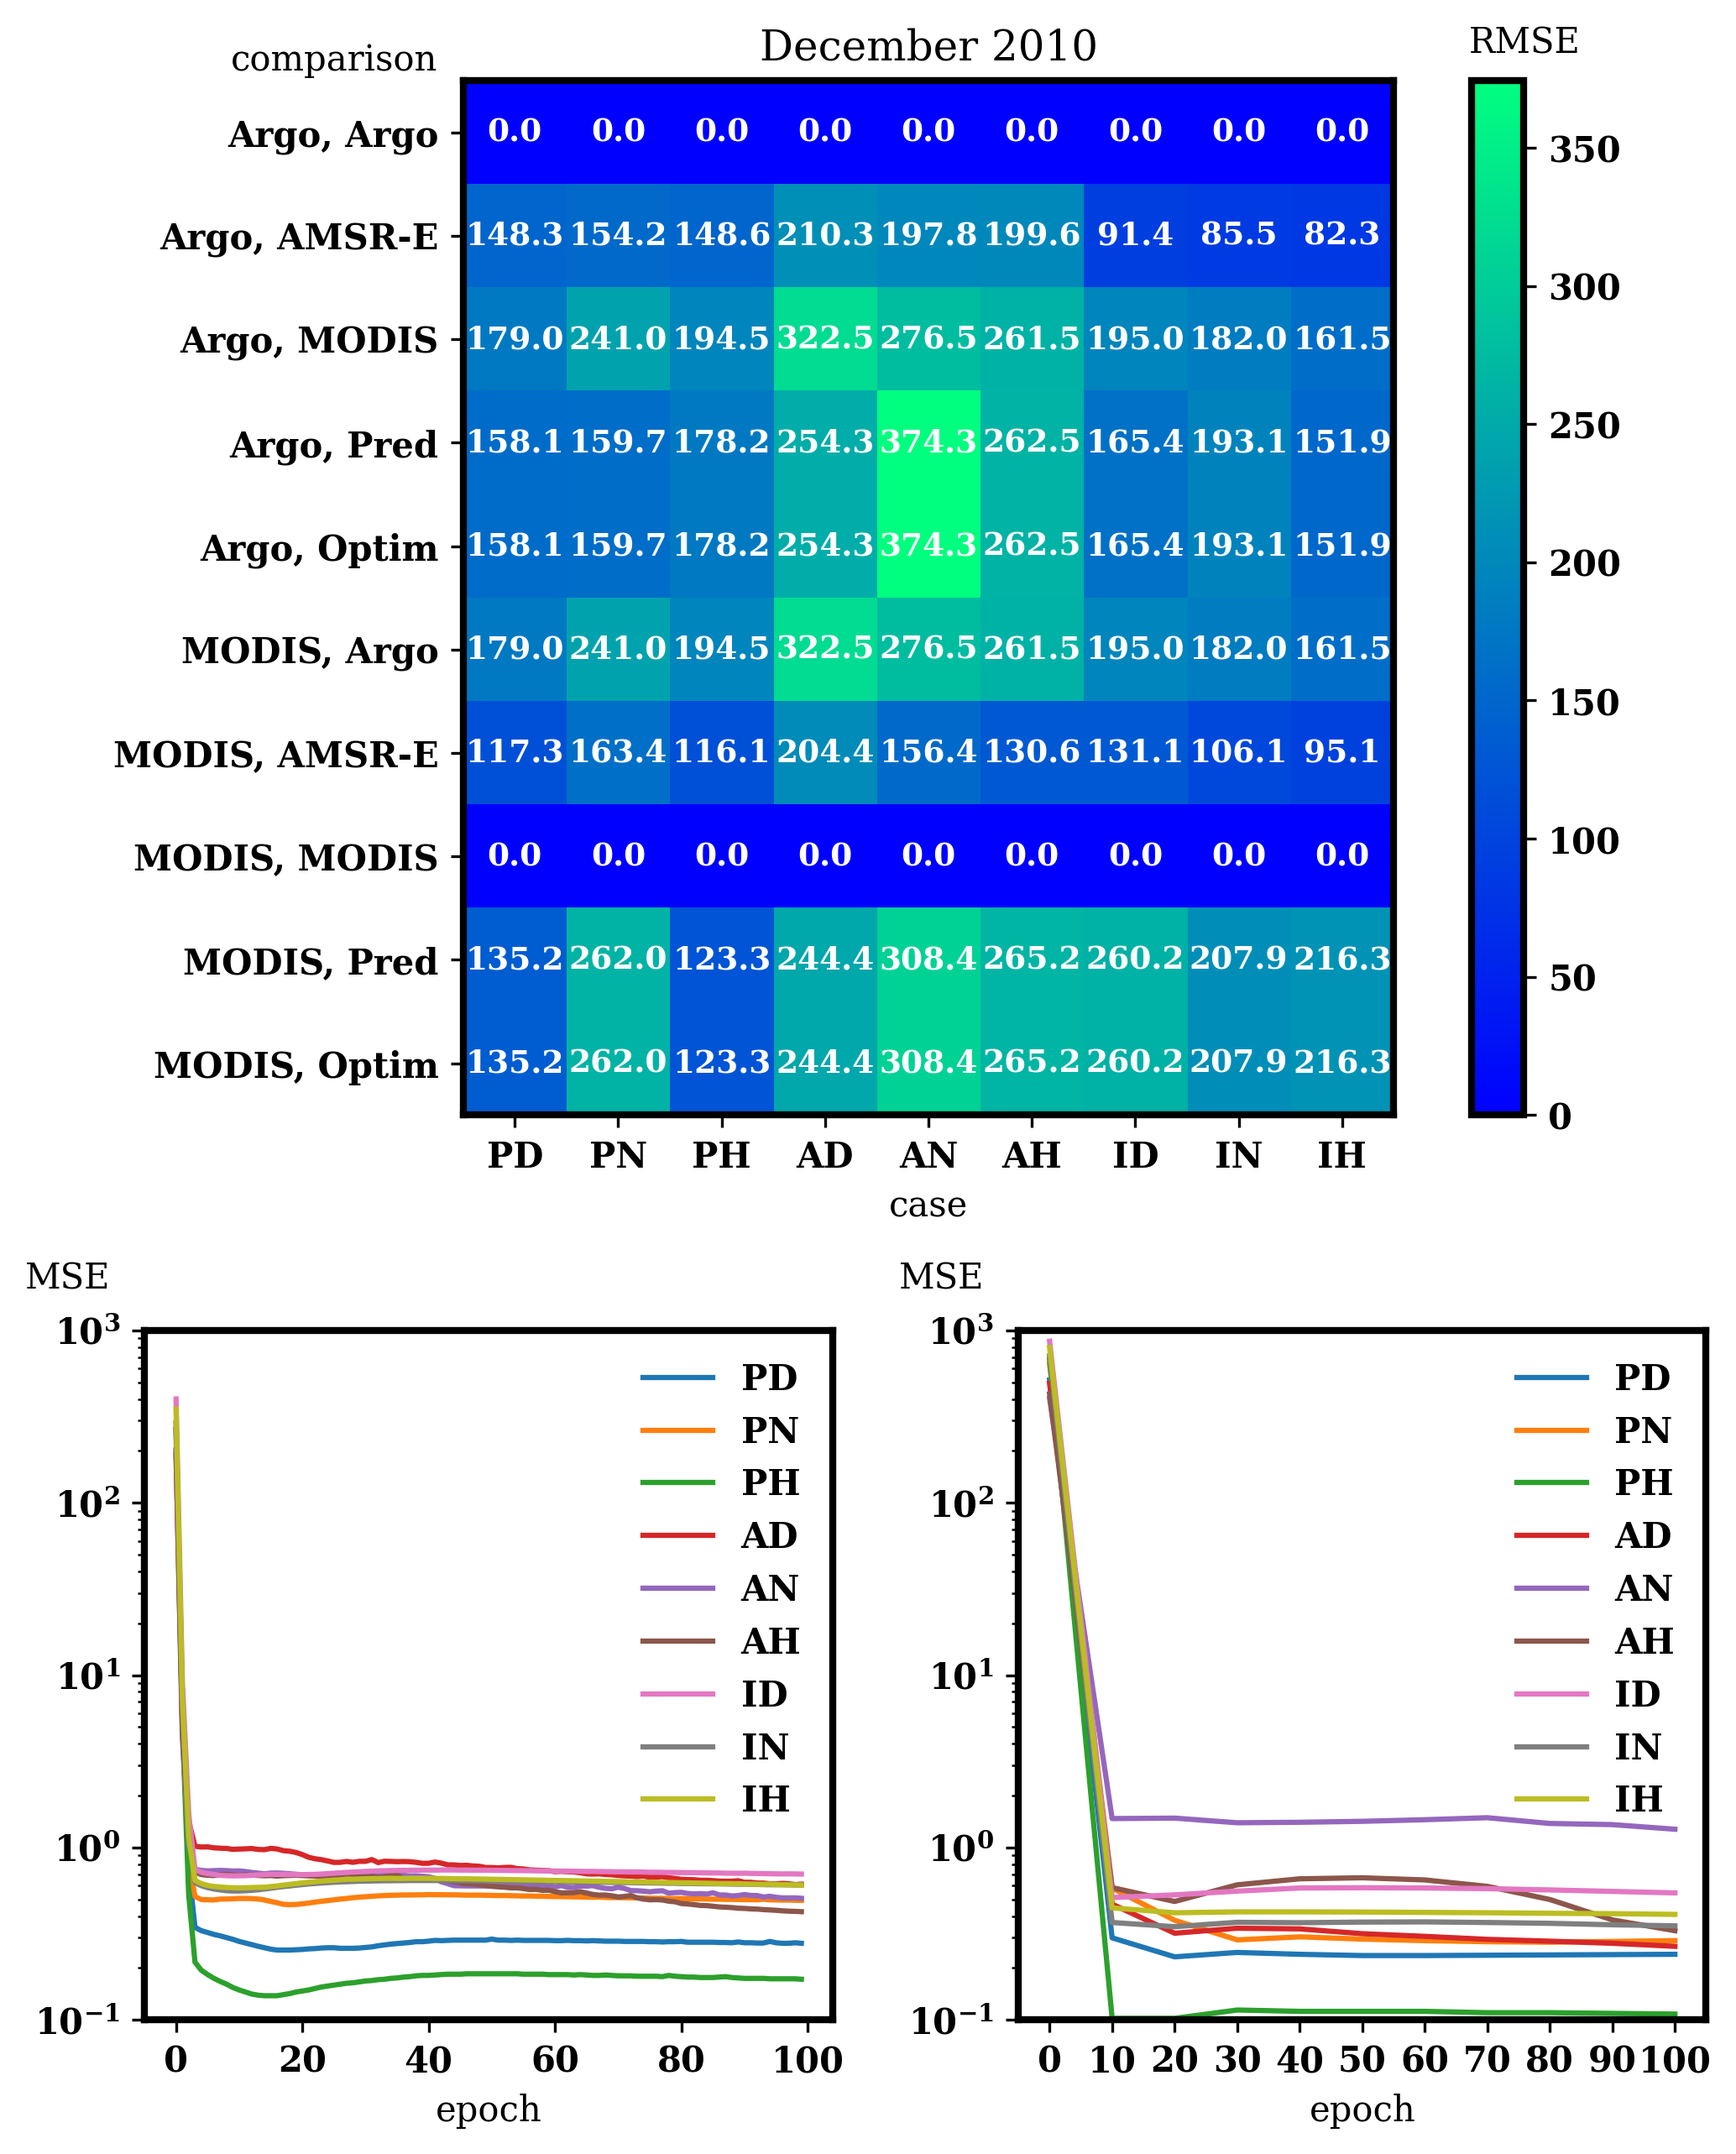

In [5]:
x1 = sorted(glob.glob('../results/revision/*trn.txt'))
y0 = p1(x1)

x2 = sorted(glob.glob('../results/revision/*val.txt'))
y1 = p1(x2)

x3 = sorted(glob.glob('../results/revision/*res.txt'))
y3 = q3(x3)

            
idx = list(range(y0.shape[1]))

fig = plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(nrows=2,ncols=1,hspace=.25,width_ratios=[1],height_ratios=[.6,.4])

fig.add_subplot(gs[0,0])


plt.imshow(y3,cmap='winter')
plt.xlabel('case')
plt.xticks(
        # rotation = 45,
        ticks=list(range(9)),
        labels=['PD','PN','PH','AD','AN','AH','ID','IN','IH'],

    )
plt.ylabel('RMSE',loc='top',rotation=0,labelpad=-50)
plt.yticks(
        ticks=list(range(10)),
        labels=['Argo, Argo',
                'Argo, AMSR-E',
                'Argo, MODIS',
                'Argo, Pred',
                'Argo, Optim',
               'MODIS, Argo',
               'MODIS, AMSR-E',
               'MODIS, MODIS',
               'MODIS, Pred',
               'MODIS, Optim'],
    )
plt.colorbar()
ax = plt.gca()
ax.yaxis.set_label_coords(1.20,1.02)
plt.title('December 2010') 
plt.annotate('comparison',(0,1),(-.25,1.01),xycoords='axes fraction',fontweight='normal')

for i in range(10):
    for j in range(9):
        text = plt.text(j, i, round(y3[i, j],1),
                       ha="center", va="center", color="white",fontsize=9)


gssp = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=2,subplot_spec=gs[1,0],wspace=.27)


ymin = 0.1
ymax = 1000

fig.add_subplot(gssp[0,0])
for i in y0:
    plt.plot(idx,i)
    ax = plt.gca()
    ax.set_ylim([ymin, ymax])
    plt.yscale('log')
    plt.ylabel('MSE',loc='top',rotation=0,labelpad=-20)
    ax.yaxis.set_label_coords(-0.05,1.05)
    plt.xlabel('epoch')
    # plt.title('Training Losses vs. Epoch')
    plt.legend(['PD','PN','PH','AD','AN','AH','ID','IN','IH'])

    
    # break

idx1 = list(range(y1.shape[1]))

fig.add_subplot(gssp[0,1])
for i in y1:
    plt.plot(idx1,i)
    ax = plt.gca()
    ax.set_ylim([ymin, ymax])
    plt.yscale('log')
    plt.ylabel('MSE',loc='top',rotation=0,labelpad=-20)
    ax.yaxis.set_label_coords(-0.05,1.05)
    plt.xlabel('epoch')
    # plt.title('Validation Losses vs. Epoch')
    plt.legend(['PD','PN','PH','AD','AN','AH','ID','IN','IH'])

    plt.xticks(
        ticks=idx1,
        labels=[0,10,20,30,40,50,60,70,80,90,100]
        # labels=y1
    )
plt.savefig('../figures/diffs_and_heatmap-9cases_revision.png',bbox_inches='tight')

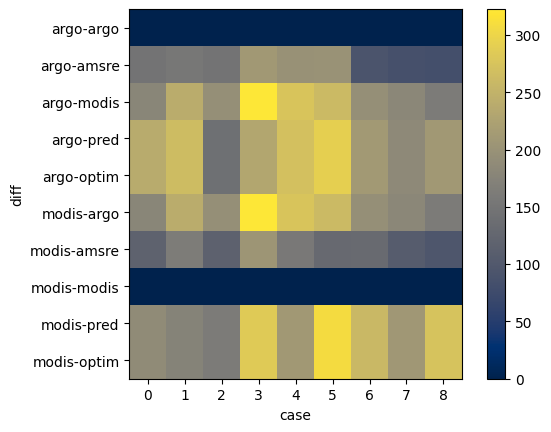

In [65]:
plt.imshow(y3,cmap='cividis')
plt.xlabel('case')
plt.xticks(
        # rotation = 45,
        ticks=list(range(9)),
        # labels= [f'case {i}' for i in range(9)],
    )
plt.ylabel('diff')
plt.yticks(
        ticks=list(range(10)),
        labels=['argo-argo',
                'argo-amsre',
                'argo-modis',
                'argo-pred',
                'argo-optim',
               'modis-argo',
               'modis-amsre',
               'modis-modis',
               'modis-pred',
               'modis-optim'],
    )
plt.colorbar()